# Data Processing
### Author: Marlene Marchena

### Importing Libraries

In [1]:
#Import data manipulation libraries
import pandas as pd
import numpy as np

#Import visualization libraries
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler #MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

#Outliers detection
from sklearn.ensemble import IsolationForest
#import seaborn as sns
#from scipy import stats

#set random seed and percentage of test data
random_seed = 12345678
np.random.seed(12345678)

## Section 1: Dataset and data processing

We are going to use credit card dataset from Kaggle, https://www.kaggle.com/mlg-ulb/creditcardfraud/home

In [2]:
def load_dataset():
    file_path = "creditcard.csv"
    data = pd.read_csv(file_path)
    return data

data = load_dataset()
print(data.shape)

(284807, 31)


### 1.1 Data Preprocessing

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Variables Time and Amount are the only variables that are not scaled, then we scale variable `Time' from seconds to hours time of day in hours

In [4]:
data.loc[:,"Time"] = data["Time"].apply(lambda x : x / 3600 % 24)
data["Time"].describe()

count    284807.000000
mean         14.537951
std           5.847061
min           0.000000
25%          10.598194
50%          15.010833
75%          19.329722
max          23.999444
Name: Time, dtype: float64

Since other variables than 'time' and 'amount' are the result from a PCA transformation it into standard-normal form. Then we transform variables 'time' and 'amount' into standard-normal form.

In [5]:
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

**Calculating Imbalance Ratio (IR) of the dataset**

In [6]:
fraud_df = data[data.Class==1]
normal_df = data[data.Class == 0] 
IR_data = (fraud_df.shape[0]/(data.shape[0]))*100
print(f'IR of the dataset is equal to {round(IR_data,3)}% (only {fraud_df.shape[0]} frauds)')

IR of the dataset is equal to 0.173% (only 492 frauds)


**Visual Exploration of Transaction Amount vs. Hour**

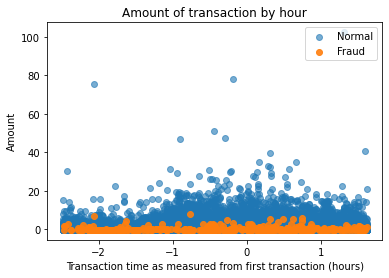

In [7]:
plt.scatter(normal_df.Time, normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter(fraud_df.Time, fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction (hours)")
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.show()

Variables Time and Amount do not seem to be correlated.

In [9]:
def data_processing(data):
    '''
    This function clean the dataset, drop NA and duplicated rows. 
    It converts features and target to numpy array
    '''
    data = data.dropna()
    data = data.drop_duplicates()
    data.columns = map(str.lower, data.columns)
    feature = data.drop(["time", "class"], axis=1)
    cols_names = list(feature)
    x = feature.values # to numpy array 
    y = data["class"].values # to numpy array
    y = np.expand_dims(y, axis=1)
    return x, y, cols_names

x, y, cols_names = data_processing(data)

print(f'The dimension of x is: {x.shape}')
print(f'The dimension of y is: {y.shape}' )
print(y.dtype)

The dimension of x is: (283726, 29)
The dimension of y is: (283726, 1)
int64


Calculating Imbalance Ratio (IR) of the dataset after processing

In [10]:
frauds = y[(y==1)]
frauds = np.expand_dims(frauds, axis=1)

normal = y[(y==0)]
normal = np.expand_dims(normal, axis=1)

IR_after_processing = (frauds.shape[0]/(frauds.shape[0]+normal.shape[0]))*100
print(f'IR of processed dataset is equal to {round(IR_after_processing ,3)}% (only {frauds.shape[0]}) frauds')

IR of processed dataset is equal to 0.167% (only 473) frauds


We have only 473 frauds samples after processing the data. We use stratified k-fold cross validation with k=5 and save train and test datasets for each fold that will be used in our analysis. This is done with the intuition to avoid overfitting and to preserve the IR of the original dataset.


In [11]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

fold = 0
for train_ix, test_ix in kfold.split(x, y):
    fold+=1
    print(f"Fold #{fold}")
    # select rows
    x_train, x_test = x[train_ix], x[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0_len, train_1_len = len(y_train[y_train==0]), len(y_train[y_train==1])
    total_train_len = (train_0_len + train_1_len)
    ir_train = train_1_len/total_train_len*100
    test_0_len, test_1_len = len(y_test[y_test==0]), len(y_test[y_test==1])
    total_test_len = (test_0_len + test_1_len)
    ir_test = test_1_len/total_test_len*100
    print('>Train: 0=%d, 1=%d, IR=%.3f, Test: 0=%d, 1=%d, IR=%.3f' % 
          (train_0_len, train_1_len, ir_train, test_0_len, test_1_len, ir_test))
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    # save to csv file
    np.savetxt(f'x_train_fold{str(fold)}.csv', x_train, delimiter=',')
    np.savetxt(f'x_test_fold{str(fold)}.csv', x_test, delimiter=',')
    np.savetxt(f'y_train_fold{str(fold)}.csv', y_train, delimiter=',')
    np.savetxt(f'y_test_fold{str(fold)}.csv', y_test, delimiter=',')

Fold #1
>Train: 0=226602, 1=378, IR=0.167, Test: 0=56651, 1=95, IR=0.167
(226980, 29)
(226980, 1)
(56746, 29)
(56746, 1)
Fold #2
>Train: 0=226602, 1=379, IR=0.167, Test: 0=56651, 1=94, IR=0.166
(226981, 29)
(226981, 1)
(56745, 29)
(56745, 1)
Fold #3
>Train: 0=226602, 1=379, IR=0.167, Test: 0=56651, 1=94, IR=0.166
(226981, 29)
(226981, 1)
(56745, 29)
(56745, 1)
Fold #4
>Train: 0=226603, 1=378, IR=0.167, Test: 0=56650, 1=95, IR=0.167
(226981, 29)
(226981, 1)
(56745, 29)
(56745, 1)
Fold #5
>Train: 0=226603, 1=378, IR=0.167, Test: 0=56650, 1=95, IR=0.167
(226981, 29)
(226981, 1)
(56745, 29)
(56745, 1)


### 1.2 Outlier detection

In [ ]:
feature = data.drop("Class", axis=1)
cols_names = list(feature)
cols_names

**Fold 1**

In [12]:
x_train1 = np.loadtxt('x_train_fold1.csv', delimiter=',')
y_train1 = np.loadtxt('y_train_fold1.csv', dtype='int32', delimiter=',')
y_train1 = y_train1.reshape(-1,1)
x_test1 = np.loadtxt('x_test_fold1.csv', delimiter=',')
y_test1 = np.loadtxt('y_test_fold1.csv', dtype='int32', delimiter=',') 
y_test1 = y_test1.reshape(-1,1)

In [13]:
# summarize train and test composition
train_0_len, train_1_len = len(y_train1[y_train1==0]), len(y_train1[y_train1==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226602, 1=378, IR=0.167


In [14]:
# identify outliers in the training dataset
iso1 = IsolationForest(contamination=0.0005, random_state=random_seed)
yhat1 = iso1.fit_predict(x_train1)
# select all rows that are not outliers
mask1 = yhat1 != -1
x_train1, y_train1 = x_train1[mask1, :], y_train1[mask1]

In [15]:
# summarize train and test composition after remove outliers
train_0_len, train_1_len = len(y_train1[y_train1==0]), len(y_train1[y_train1==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226527, 1=339, IR=0.149


In [16]:
# save to csv file
np.savetxt(f'x_train1_outlierTreatment.csv', x_train1, delimiter=',')
np.savetxt(f'y_train1_outlierTreatment.csv', y_train1, delimiter=',')

**Fold 2**

In [17]:
x_train2 = np.loadtxt('x_train_fold2.csv', delimiter=',')
y_train2 = np.loadtxt('y_train_fold2.csv', dtype='int32', delimiter=',')
y_train2 = y_train2.reshape(-1,1)
x_test2 = np.loadtxt('x_test_fold2.csv', delimiter=',')
y_test2 = np.loadtxt('y_test_fold2.csv', dtype='int32', delimiter=',') 
y_test2 = y_test2.reshape(-1,1)

In [18]:
# summarize train and test composition 
train_0_len, train_1_len = len(y_train2[y_train2==0]), len(y_train2[y_train2==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226602, 1=379, IR=0.167


In [19]:
# identify outliers in the training dataset
iso2 = IsolationForest(contamination=0.0005, random_state=random_seed)
yhat2 = iso2.fit_predict(x_train2)
# select all rows that are not outliers
mask2 = yhat2 != -1
x_train2, y_train2 = x_train2[mask2, :], y_train2[mask2]

In [20]:
# summarize train and test composition after remove outliers
train_0_len, train_1_len = len(y_train2[y_train2==0]), len(y_train2[y_train2==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226517, 1=350, IR=0.154


In [21]:
# save to csv file
np.savetxt(f'x_train2_outlierTreatment.csv', x_train2, delimiter=',')
np.savetxt(f'y_train2_outlierTreatment.csv', y_train2, delimiter=',')

**Fold 3**

In [22]:
x_train3 = np.loadtxt('x_train_fold3.csv', delimiter=',')
y_train3 = np.loadtxt('y_train_fold3.csv', dtype='int32', delimiter=',')
y_train3 = y_train3.reshape(-1,1)
x_test3 = np.loadtxt('x_test_fold3.csv', delimiter=',')
y_test3 = np.loadtxt('y_test_fold3.csv', dtype='int32', delimiter=',') 
y_test3 = y_test3.reshape(-1,1)

In [23]:
# summarize train and test composition 
train_0_len, train_1_len = len(y_train3[y_train3==0]), len(y_train3[y_train3==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226602, 1=379, IR=0.167


In [24]:
# identify outliers in the training dataset
iso3 = IsolationForest(contamination=0.0005, random_state=random_seed)
yhat3 = iso3.fit_predict(x_train3)
# select all rows that are not outliers
mask3 = yhat3 != -1
x_train3, y_train3 = x_train3[mask3, :], y_train3[mask3]

In [25]:
# summarize train and test composition
train_0_len, train_1_len = len(y_train3[y_train3==0]), len(y_train3[y_train3==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226514, 1=353, IR=0.156


In [26]:
# save to csv file
np.savetxt(f'x_train3_outlierTreatment.csv', x_train3, delimiter=',')
np.savetxt(f'y_train3_outlierTreatment.csv', y_train3, delimiter=',')

**Fold 4**

In [27]:
x_train4 = np.loadtxt('x_train_fold4.csv', delimiter=',')
y_train4 = np.loadtxt('y_train_fold4.csv', dtype='int32', delimiter=',')
y_train4 = y_train4.reshape(-1,1)
x_test4 = np.loadtxt('x_test_fold4.csv', delimiter=',')
y_test4 = np.loadtxt('y_test_fold4.csv', dtype='int32', delimiter=',') 
y_test4 = y_test4.reshape(-1,1)

In [28]:
# summarize train and test composition 
train_0_len, train_1_len = len(y_train4[y_train4==0]), len(y_train4[y_train4==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226603, 1=378, IR=0.167


In [29]:
# identify outliers in the training dataset
iso4 = IsolationForest(contamination=0.0005, random_state=random_seed)
yhat4 = iso4.fit_predict(x_train4)
# select all rows that are not outliers
mask4 = yhat4 != -1
x_train4, y_train4 = x_train4[mask4, :], y_train4[mask4]

In [30]:
# summarize train and test composition
train_0_len, train_1_len = len(y_train4[y_train4==0]), len(y_train4[y_train4==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226526, 1=341, IR=0.150


In [31]:
# save to csv file
np.savetxt(f'x_train4_outlierTreatment.csv', x_train4, delimiter=',')
np.savetxt(f'y_train4_outlierTreatment.csv', y_train4, delimiter=',')

**Fold 5**

In [32]:
x_train5 = np.loadtxt('x_train_fold5.csv', delimiter=',')
y_train5 = np.loadtxt('y_train_fold5.csv', dtype='int32', delimiter=',')
y_train5 = y_train5.reshape(-1,1)
x_test5 = np.loadtxt('x_test_fold5.csv', delimiter=',')
y_test5 = np.loadtxt('y_test_fold5.csv', dtype='int32', delimiter=',') 
y_test5 = y_test5.reshape(-1,1)

In [33]:
# summarize train and test composition 
train_0_len, train_1_len = len(y_train5[y_train5==0]), len(y_train5[y_train5==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226603, 1=378, IR=0.167


In [34]:
# identify outliers in the training dataset
iso5 = IsolationForest(contamination=0.0005, random_state=random_seed)
yhat5 = iso5.fit_predict(x_train5)
# select all rows that are not outliers
mask5 = yhat5 != -1
x_train5, y_train5 = x_train5[mask5, :], y_train5[mask5]

In [35]:
# summarize train and test composition
train_0_len, train_1_len = len(y_train5[y_train5==0]), len(y_train5[y_train5==1])
total_train_len = (train_0_len + train_1_len)
ir_train = train_1_len/total_train_len*100

print('>Train: 0=%d, 1=%d, IR=%.3f' % 
      (train_0_len, train_1_len, ir_train))

>Train: 0=226526, 1=341, IR=0.150


In [36]:
# save to csv file
np.savetxt(f'x_train5_outlierTreatment.csv', x_train5, delimiter=',')
np.savetxt(f'y_train5_outlierTreatment.csv', y_train5, delimiter=',')